## Analiza i Bazy Danych
## Exploratory Data Analysis
## Andrzej Janik 406174

In [295]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

my_name = 'Andrzej Janik'
data_to_analysis  = sum(len(x) for x in my_name.split()) % 16
print('Zbiór danych do analizy: {} - województwo świętokrzyskie'.format(data_to_analysis))

Zbiór danych do analizy: 12 - województwo świętokrzyskie


In [296]:
data = pd.read_csv('..\OriginalData/12_S╠üWIE╠ĘTOKRZYSKIE.csv')
data_copy = data.copy()
#save_path =  "/Users/Andrzej/Desktop/5 semestr/AiBD_2022/Laboratorium_6/AnalysisData"

save_path_plots =  "/Users/Andrzej/Desktop/5 semestr/AiBD_2022/Laboratorium_6/AnalysisData/plots"
save_path_csv =  "/Users/Andrzej/Desktop/5 semestr/AiBD_2022/Laboratorium_6/AnalysisData/csv files"
data

,Unnamed: 0,Dni od zakupu,Marka,Wiek kupującego,Płeć kupującego,Ocena
0,0,7,Beko,33.0,M,3.0
1,1,7,Beko,55.0,bd.,3.0
2,2,10,Beko,50.0,M,2.0
3,3,11,Tefal,36.0,M,2.5
4,4,3,Beko,62.0,K,2.5
...,...,...,...,...,...,...
461,461,8,Beko,19.0,M,2.5
462,462,9,Electrolux,50.0,K,3.0
463,463,9,Beko,NaN,K,2.0
464,464,5,Tefal,41.0,M,3.0


In [297]:
del data['Unnamed: 0']
del data_copy['Unnamed: 0']

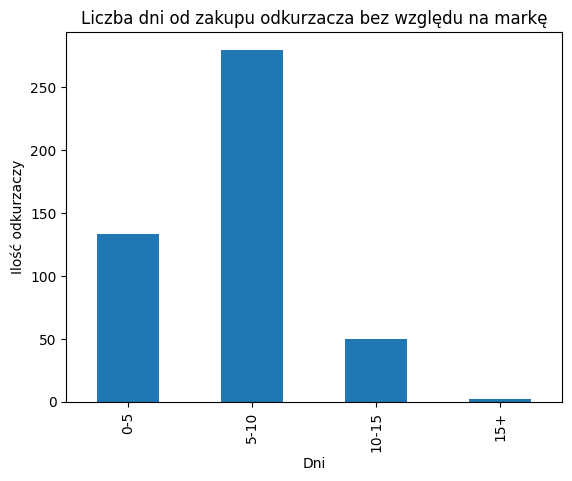

In [298]:
data_dni = data.filter(['Dni od zakupu'], axis = 1)
data_dni['Przedział dni'] = pd.cut(data_dni['Dni od zakupu'], [0, 5, 10, 15, np.inf], labels=['0-5', '5-10', '10-15', '15+'])
data_dni = data_dni['Przedział dni'].to_frame()
data_dni = data_dni.groupby('Przedział dni').size()
data_dni.plot.bar()
plt.title("Liczba dni od zakupu odkurzacza bez względu na markę")
plt.xlabel("Dni")
plt.ylabel("Ilość odkurzaczy")
plt.savefig(save_path_plots + "/Liczba dni od zakupu odkurzacza bez względu na markę.png")
plt.show()
data_dni.to_csv(save_path_csv + "/Dni od zakupu.csv")


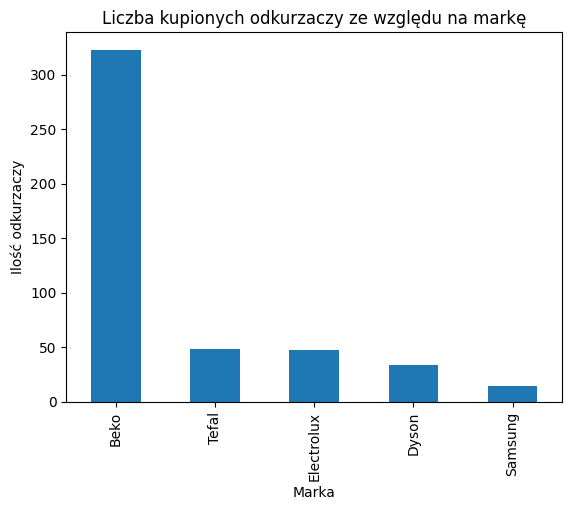

In [299]:
data['Marka'].value_counts().plot.bar()
plt.title("Liczba kupionych odkurzaczy ze względu na markę")
plt.ylabel("Ilość odkurzaczy")
plt.xlabel("Marka")
plt.savefig(save_path_plots + "/Liczba kupionych odkurzaczy ze względu na markę.png")
plt.show()
data['Marka'].value_counts().to_csv(save_path_csv + "/Liczba kupionych odkurzaczy ze względu na markę.csv")

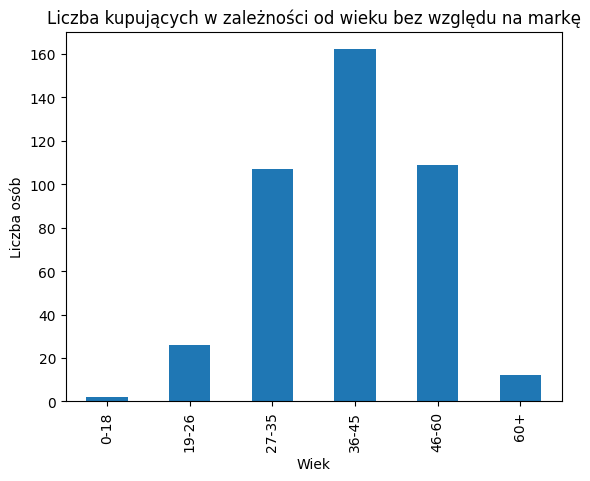

In [300]:
data_wiek = data.filter(['Wiek kupującego'], axis = 1)
data_wiek['Przedział wieku'] = pd.cut(data_wiek['Wiek kupującego'], [0, 18, 26, 35, 45,60, np.inf], labels=['0-18', '19-26','27-35', '36-45', '46-60', '60+'])
data_wiek = data_wiek['Przedział wieku'].to_frame()
data_wiek = data_wiek.groupby('Przedział wieku').size()
data_wiek.plot.bar()
plt.title("Liczba kupujących w zależności od wieku bez względu na markę")
plt.ylabel("Liczba osób")
plt.xlabel("Wiek")
plt.savefig(save_path_plots + "/Liczba kupujących w zależności od wieku bez względu na markę.png")
plt.show()
data_wiek.to_csv(save_path_csv + "/Wiek kupującego.csv")

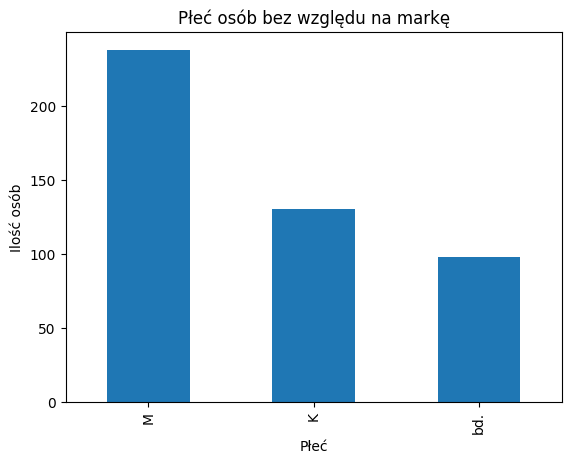

In [301]:
data['Płeć kupującego'].value_counts().plot.bar()
plt.title("Płeć osób bez względu na markę")
plt.ylabel("Ilość osób")
plt.xlabel("Płeć")
plt.savefig(save_path_plots + "/Płeć osób bez względu na markę.png")
plt.show()
data['Płeć kupującego'].value_counts().to_csv(save_path_csv + "/Płeć kupującego.csv")

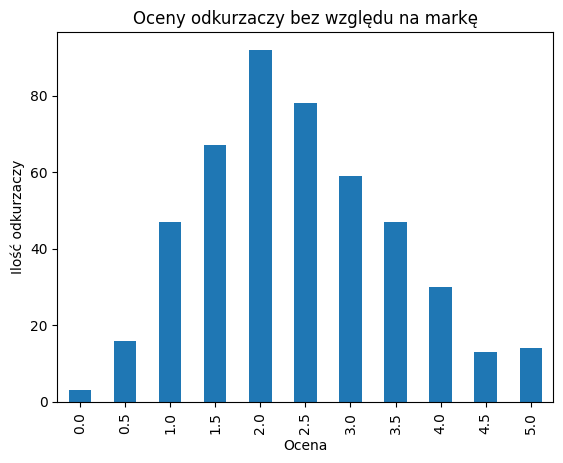

In [302]:
data = data.filter(['Ocena'], axis = 1)
data = data.groupby('Ocena').size()
data.plot.bar()
plt.title("Oceny odkurzaczy bez względu na markę")
plt.ylabel("Ilość odkurzaczy")
plt.xlabel("Ocena")
plt.savefig(save_path_plots + "/Oceny odkurzaczy bez względu na markę.png")
plt.show()
data.to_csv(save_path_csv + "/Oceny.csv")

### Analiza danych dla każdej marki odkurzacza

### marka Beko

In [303]:
data = data_copy

In [304]:
data_beko = data[data['Marka'] == 'Beko']

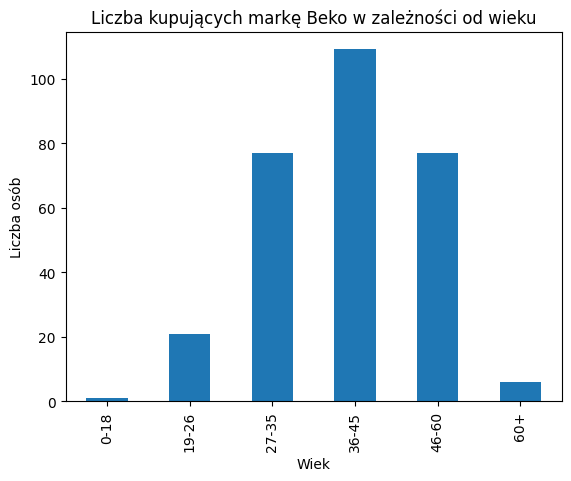

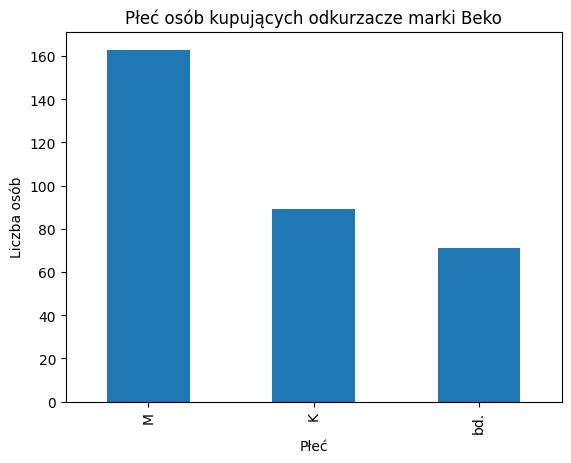

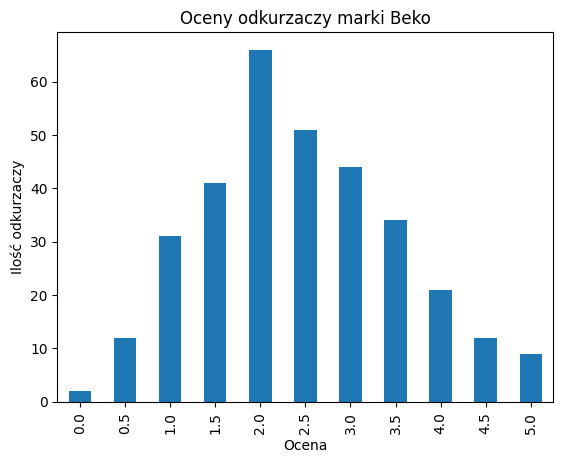

In [305]:
data_beko_wiek = data_beko.filter(['Wiek kupującego'], axis = 1)
data_beko_wiek['Przedział wieku'] = pd.cut(data_beko_wiek['Wiek kupującego'], [0, 18, 26, 35, 45,60, np.inf], labels=['0-18', '19-26','27-35', '36-45', '46-60', '60+'])
data_beko_wiek = data_beko_wiek['Przedział wieku'].to_frame()
data_beko_wiek = data_beko_wiek.groupby('Przedział wieku').size()
data_beko_wiek.plot.bar()
plt.title("Liczba kupujących markę Beko w zależności od wieku")
plt.ylabel("Liczba osób")
plt.xlabel("Wiek")
plt.savefig(save_path_plots + "/Liczba kupujących markę Beko w zależności od wieku.png")
plt.show()
data_beko_wiek.to_csv(save_path_csv + "/Wiek kupującego markę Beko.csv")

data_beko['Płeć kupującego'].value_counts().plot.bar()
plt.title("Płeć osób kupujących odkurzacze marki Beko")
plt.ylabel("Liczba osób")
plt.xlabel("Płeć")
plt.savefig(save_path_plots + "/Płeć osób kupujących odkurzacze marki Beko.png")
plt.show()
data_beko['Płeć kupującego'].value_counts().to_csv(save_path_csv + "/Płeć kupującego markę Beko.csv")

data_beko_ocena = data_beko.filter(['Ocena'], axis=1)
data_beko_ocena = data_beko_ocena.groupby('Ocena').size()
data_beko_ocena.plot.bar()
plt.title("Oceny odkurzaczy marki Beko")
plt.ylabel("Ilość odkurzaczy")
plt.xlabel("Ocena")
plt.savefig(save_path_plots + "/Oceny odkurzaczy marki Beko.png")
plt.show()
data_beko_ocena.to_csv(save_path_csv + "/Ocena marki Beko.csv")



### marka - Tefal

In [306]:
data_tefal = data[data['Marka'] == 'Tefal']

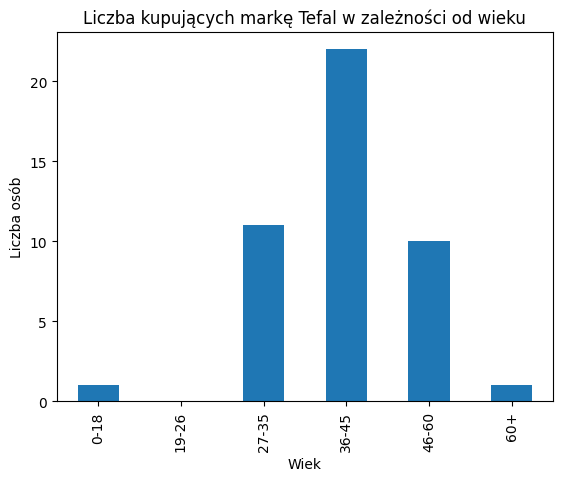

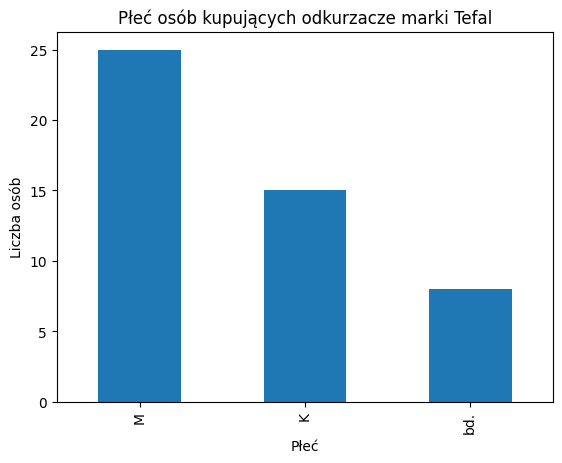

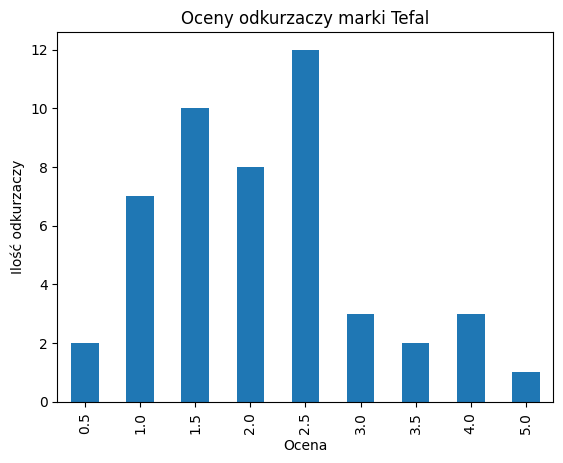

In [307]:
data_tefal_wiek = data_tefal.filter(['Wiek kupującego'], axis = 1)
data_tefal_wiek['Przedział wieku'] = pd.cut(data_tefal_wiek['Wiek kupującego'], [0, 18, 26, 35, 45,60, np.inf], labels=['0-18', '19-26','27-35', '36-45', '46-60', '60+'])
data_tefal_wiek = data_tefal_wiek['Przedział wieku'].to_frame()
data_tefal_wiek = data_tefal_wiek.groupby('Przedział wieku').size()
data_tefal_wiek.plot.bar()
plt.title("Liczba kupujących markę Tefal w zależności od wieku")
plt.ylabel("Liczba osób")
plt.xlabel("Wiek")
plt.savefig(save_path_plots + "/Liczba kupujących markę Tefal w zależności od wieku.png")
plt.show()

data_tefal['Płeć kupującego'].value_counts().plot.bar()
plt.title("Płeć osób kupujących odkurzacze marki Tefal")
plt.ylabel("Liczba osób")
plt.xlabel("Płeć")
plt.savefig(save_path_plots + "/Płeć osób kupujących odkurzacze marki Tefal.png")
plt.show()

data_tefal_ocena = data_tefal.filter(['Ocena'], axis=1)
data_tefal_ocena = data_tefal_ocena.groupby('Ocena').size()
data_tefal_ocena.plot.bar()
plt.title("Oceny odkurzaczy marki Tefal")
plt.ylabel("Ilość odkurzaczy")
plt.xlabel("Ocena")
plt.savefig(save_path_plots + "/Oceny odkurzaczy marki Tefal.png")
plt.show()

data_tefal_wiek.to_csv(save_path_csv + "/Wiek kupującego markę Tefal.csv")
data_tefal['Płeć kupującego'].value_counts().to_csv(save_path_csv + "/Płeć kupującego markę Tefal.csv")
data_tefal_ocena.to_csv(save_path_csv + "/Ocena marki Tefal.csv")

### marka - Electrolux

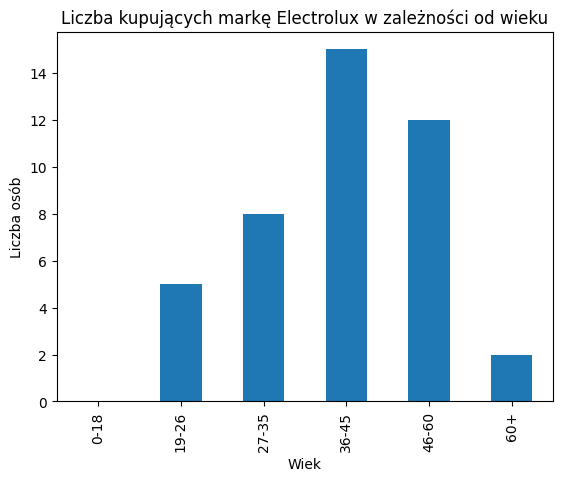

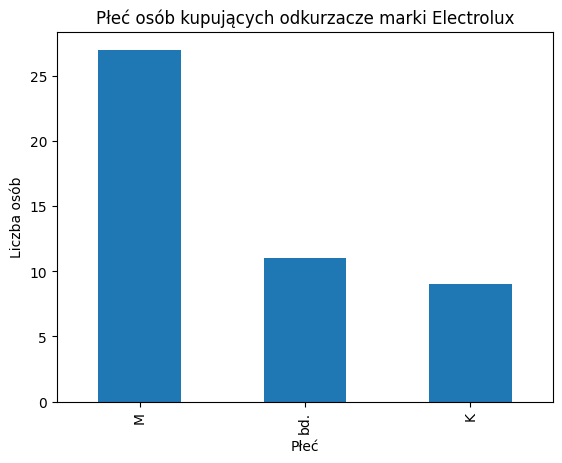

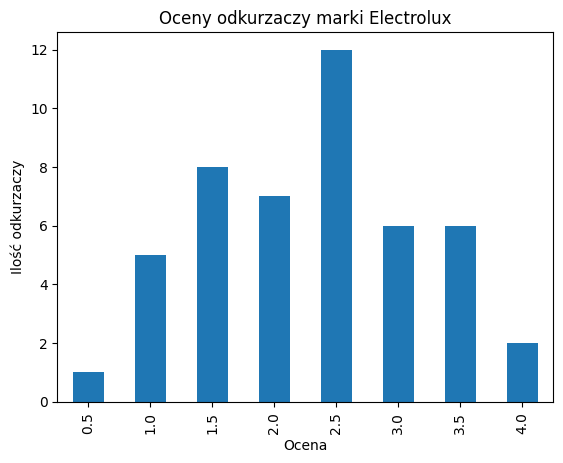

In [308]:
data_electrolux = data[data['Marka'] == 'Electrolux']

data_electrolux_wiek = data_electrolux.filter(['Wiek kupującego'], axis=1)
data_electrolux_wiek['Przedział wieku'] = pd.cut(data_electrolux_wiek['Wiek kupującego'], [0, 18, 26, 35, 45,60, np.inf], labels=['0-18', '19-26','27-35', '36-45', '46-60', '60+'])
data_electrolux_wiek = data_electrolux_wiek['Przedział wieku'].to_frame()
data_electrolux_wiek = data_electrolux_wiek.groupby('Przedział wieku').size()
data_electrolux_wiek.plot.bar()
plt.title("Liczba kupujących markę Electrolux w zależności od wieku")
plt.ylabel("Liczba osób")
plt.xlabel("Wiek")
plt.savefig(save_path_plots + "/Liczba kupujących markę Electrolux w zależności od wieku.png")
plt.show()

data_electrolux['Płeć kupującego'].value_counts().plot.bar()
plt.title("Płeć osób kupujących odkurzacze marki Electrolux")
plt.ylabel("Liczba osób")
plt.xlabel("Płeć")
plt.savefig(save_path_plots + "/Płeć osób kupujących odkurzacze marki Electrolux.png")
plt.show()

data_electrolux_ocena = data_electrolux.filter(['Ocena'], axis=1)
data_electrolux_ocena = data_electrolux_ocena.groupby('Ocena').size()
data_electrolux_ocena.plot.bar()
plt.title("Oceny odkurzaczy marki Electrolux")
plt.ylabel("Ilość odkurzaczy")
plt.xlabel("Ocena")
plt.savefig(save_path_plots + "/Oceny odkurzaczy marki Electrolux.png")
plt.show()

data_electrolux_wiek.to_csv(save_path_csv + "/Wiek kupującego markę Electrolux.csv")
data_electrolux['Płeć kupującego'].value_counts().to_csv(save_path_csv + "/Płeć kupującego markę Electrolux.csv")
data_electrolux_ocena.to_csv(save_path_csv + "/Ocena marki Electrolux.csv")

### marka - Dyson

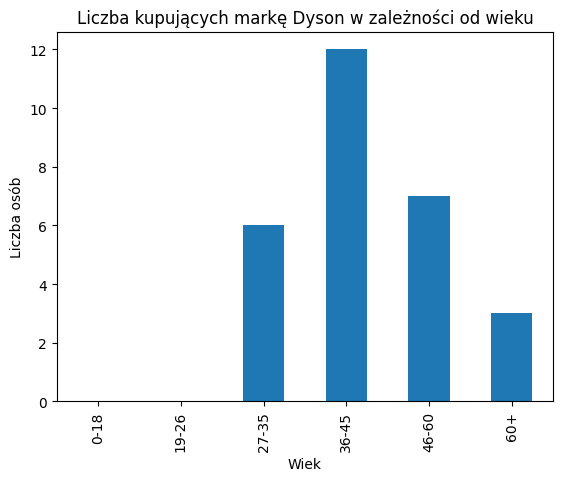

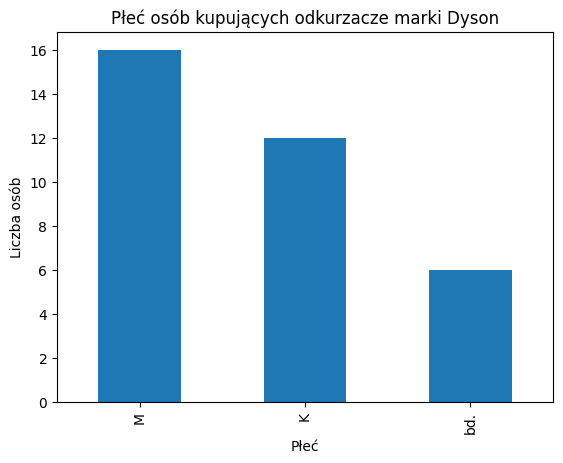

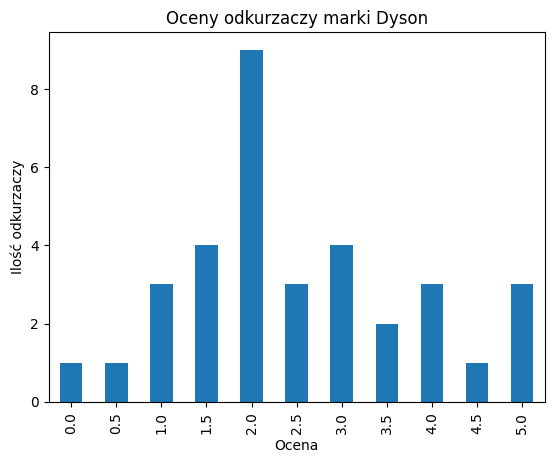

In [309]:
data_dyson = data[data['Marka'] == 'Dyson']

data_dyson_wiek = data_dyson.filter(['Wiek kupującego'], axis=1)
data_dyson_wiek['Przedział wieku'] = pd.cut(data_dyson_wiek['Wiek kupującego'], [0, 18, 26, 35, 45,60, np.inf], labels=['0-18', '19-26','27-35', '36-45', '46-60', '60+'])
data_dyson_wiek = data_dyson_wiek['Przedział wieku'].to_frame()
data_dyson_wiek = data_dyson_wiek.groupby('Przedział wieku').size()
data_dyson_wiek.plot.bar()
plt.title("Liczba kupujących markę Dyson w zależności od wieku")
plt.ylabel("Liczba osób")
plt.xlabel("Wiek")
plt.savefig(save_path_plots + "/Liczba kupujących markę Dyson w zależności od wieku.png")
plt.show()

data_dyson['Płeć kupującego'].value_counts().plot.bar()
plt.title("Płeć osób kupujących odkurzacze marki Dyson")
plt.ylabel("Liczba osób")
plt.xlabel("Płeć")
plt.savefig(save_path_plots + "/Płeć osób kupujących odkurzacze marki Dyson.png")
plt.show()

data_dyson_ocena = data_dyson.filter(['Ocena'], axis=1)
data_dyson_ocena = data_dyson_ocena.groupby('Ocena').size()
data_dyson_ocena.plot.bar()
plt.title("Oceny odkurzaczy marki Dyson")
plt.ylabel("Ilość odkurzaczy")
plt.xlabel("Ocena")
plt.savefig(save_path_plots + "/Oceny odkurzaczy marki Dyson.png")
plt.show()

data_dyson_wiek.to_csv(save_path_csv + "/Wiek kupującego markę Dyson.csv")
data_dyson['Płeć kupującego'].value_counts().to_csv(save_path_csv + "/Płeć kupującego markę Dyson.csv")
data_dyson_ocena.to_csv(save_path_csv + "/Ocena marki Dyson.csv")


### marka - Samsung

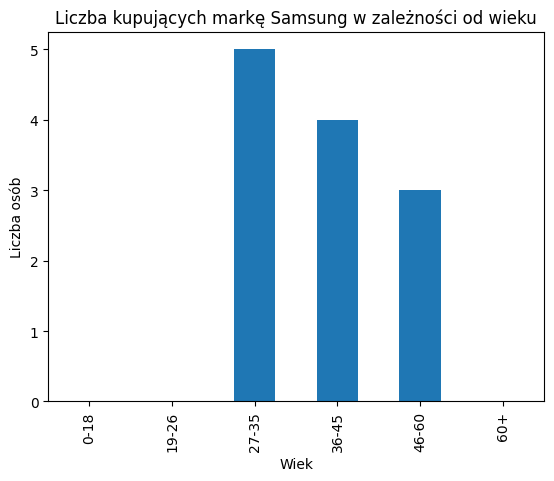

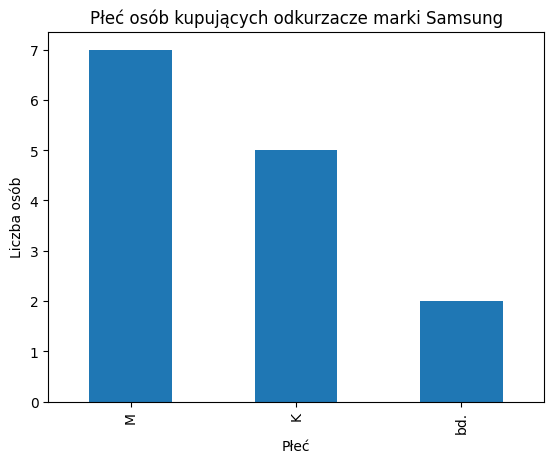

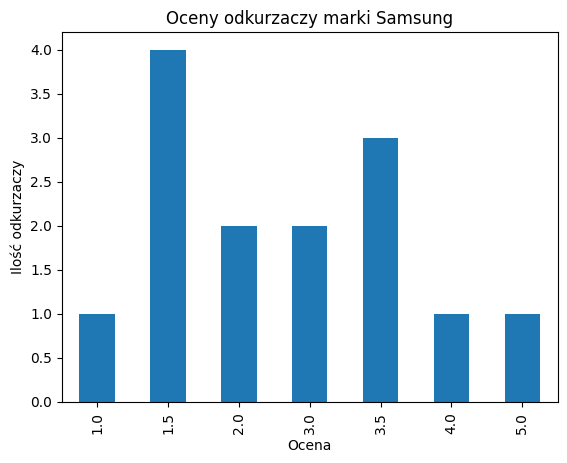

In [310]:
data_samsung = data[data['Marka'] == 'Samsung']

data_samsung_wiek = data_samsung.filter(['Wiek kupującego'], axis=1)
data_samsung_wiek['Przedział wieku'] = pd.cut(data_samsung_wiek['Wiek kupującego'], [0, 18, 26, 35, 45,60, np.inf], labels=['0-18', '19-26','27-35', '36-45', '46-60', '60+'])
data_samsung_wiek = data_samsung_wiek['Przedział wieku'].to_frame()
data_samsung_wiek = data_samsung_wiek.groupby('Przedział wieku').size()
data_samsung_wiek.plot.bar()
plt.title("Liczba kupujących markę Samsung w zależności od wieku")
plt.ylabel("Liczba osób")
plt.xlabel("Wiek")
plt.savefig(save_path_plots + "/Liczba kupujących markę Samsung w zależności od wieku.png")
plt.show()

data_samsung['Płeć kupującego'].value_counts().plot.bar()
plt.title("Płeć osób kupujących odkurzacze marki Samsung")
plt.ylabel("Liczba osób")
plt.xlabel("Płeć")
plt.savefig(save_path_plots + "/Płeć osób kupujących odkurzacze marki Samsung.png")
plt.show()

data_samsung_ocena = data_samsung.filter(['Ocena'], axis=1)
data_samsung_ocena = data_samsung_ocena.groupby('Ocena').size()
data_samsung_ocena.plot.bar()
plt.title("Oceny odkurzaczy marki Samsung")
plt.ylabel("Ilość odkurzaczy")
plt.xlabel("Ocena")
plt.savefig(save_path_plots + "/Oceny odkurzaczy marki Samsung.png")
plt.show()

data_samsung_wiek.to_csv(save_path_csv + "/Wiek kupującego markę Samsung.csv")
data_samsung['Płeć kupującego'].value_counts().to_csv(save_path_csv + "/Płeć kupującego markę Samsung.csv")
data_samsung_ocena.to_csv(save_path_csv + "/Ocena marki Samsung.csv")